Лабораторная работа №2: Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины. Выполнил Суслов Сергей
1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic  (или в других источниках) предположительно зависимые данные (например: «доля людей в возрасте 70+» и «приверженность жителей тех к ЗОЖ» по регионам), посчитать коэффициент корреляции, оценить меру связи.
Построить гистограммы рассеяния, линию аппроксимации  и посчитать величину достоверности аппроксимации R^2.
2.	Найти датасет с объемом примерно 100 наблюдений (и более), сделать выборку = примерно 1/3 наблюдений
    1) случайным образом,
    2) сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию, например, для регионов стратами могут быть федеральные округа).
3.	Посчитать
    1) среднее значение по выборкам из п.2 (2.1)случайной и 2.2)стратифицированной),
    2) доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
 Сравнить среднее генеральной выборки п.2  с полученными в выборках 2.1) и 2.2)  и с границами доверительных интервалов из п.3.2).


1. Расчет корреляции между средним доходом (avg_income) и коэффициентом счастья (happyScore), оценка меры связи. Построение гистограммы рассеяния, линии аппроксимации и рассчет величины достоверности аппроксимации R^2.
Датасет: https://www.kaggle.com/datasets/levyedgar44/income-and-happiness-correction

In [33]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
matplotlib.use('TkAgg')
%matplotlib inline

In [34]:
data = pd.read_csv('happyscore_income.csv')
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


In [35]:
correlation, p_value = stats.pearsonr(data['avg_income'], data['happyScore'])
print(f"Коэффициент корреляции Пирсона: {correlation:.2f}")
print(f"p-значение: {p_value:.2f}")

Коэффициент корреляции Пирсона: 0.78
p-значение: 0.00


Коэффициент корреляции 0.78 свидетельствует о значительной положительной взаимосвязи между avgincome и happyScore.
P-значение 0.00 говорит о том, что вероятность случайного получения такой корреляции (при верности нулевой гипотезы) стремится к нулю. Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу о статистической значимости корреляции между avgincome и happyScore.

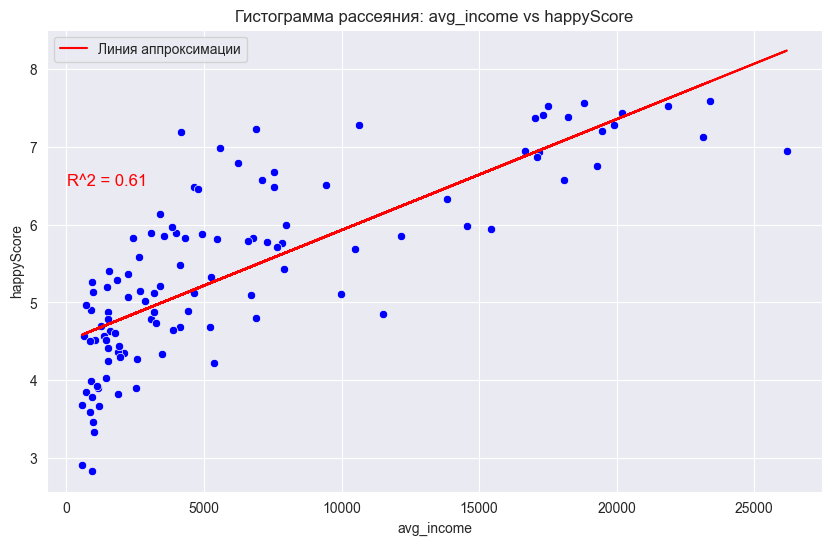

In [36]:
# Построение гистограммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_income', y='happyScore', data=data, color='blue')
plt.title('Гистограмма рассеяния: avg_income vs happyScore')
plt.xlabel('avg_income')
plt.ylabel('happyScore')

# Добавление линии аппроксимации
X = data[['avg_income']]
y = data['happyScore']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label='Линия аппроксимации')

r_squared = model.score(X, y)

plt.text(4.5, 6.5, f'R^2 = {r_squared:.2f}', fontsize=12, color='red')

plt.legend()
plt.show()

2. Cделать выборку =~ 1/3 наблюдений:

1) случайным образом,
2) сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию - по регионам).

In [37]:
# Случайная выборка
random_sample = data.sample(frac=1 / 3, random_state=42)
print("Случайная выборка:")
print(random_sample.head())

Случайная выборка:
      country  adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
78      Nepal                   48.0               5.3              1.65   
10    Burundi                   25.0               2.9              1.96   
4   Australia                   65.0               7.6              1.80   
84   Portugal                   47.0               5.8              2.16   
64    Moldova                   42.0               5.3              2.25   

    avg_income  median_income  income_inequality  \
78    1428.120    1155.000000          32.840000   
10     572.880     436.920000          33.360000   
4    19917.000   15846.060000          35.285000   
84    9982.875    7800.645000          36.630000   
64    3077.280    2547.413333          32.674444   

                          region  happyScore      GDP  country.1  
78               'Southern Asia'       4.514  0.35997      Nepal  
10          'Sub-Saharan Africa'       2.905  0.01530    Burundi  
4    'Aust

In [38]:
# Стратифицированная выборка
stratified_sample = data.groupby('region', group_keys=False).apply(lambda x: x.sample(frac=1 / 3, random_state=42))
print("Стратифицированная выборка:")
print(stratified_sample.head())

Стратифицированная выборка:
       country  adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
83      Poland                   55.0               6.8              2.23   
52  Kyrgyzstan                   48.0               5.8              2.09   
0      Armenia                   37.0               4.9              2.42   
42     Hungary                   42.0               5.5              2.48   
87      Serbia                   44.0               5.6              2.32   

     avg_income  median_income  income_inequality  \
83  6582.465882    5451.247059          33.588824   
52  1852.640000    1530.133333          31.035556   
0   2096.760000    1731.506667          31.445556   
42  6903.883636    6056.716364          29.555455   
87  4629.908571    3992.502857          29.727143   

                          region  happyScore      GDP   country.1  
83  'Central and Eastern Europe'       5.791  1.12555      Poland  
52  'Central and Eastern Europe'       5.286  0.47428 

C:\Users\Сергей\AppData\Local\Temp\ipykernel_11276\4006482245.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('region', group_keys=False).apply(lambda x: x.sample(frac=1 / 3, random_state=42))


3. Посчитать:

1) среднее значение по выборкам из п.2 (2.1 случайной и 2.2 стратифицированной),
2) доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
3) Сравнить среднее генеральной выборки п.2 с полученными в выборках 2.1 и 2.2 и с границами доверительных интервалов из п.3.2.

In [39]:
# Функция для расчета доверительного интервала
def get_confidence_interval(data, confidence=0.95):
    length = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2, length - 1)
    return mean, mean - h, mean + h


# 1. Среднее значение по выборкам
random_mean = random_sample['avg_income'].mean()
stratified_mean = stratified_sample['avg_income'].mean()

print(f"Среднее значение случайной выборки: {random_mean:.2f}")
print(f"Среднее значение стратифицированной выборки: {stratified_mean:.2f}")

# 2. Доверительные интервалы для среднего
random_ci_90 = get_confidence_interval(random_sample['avg_income'], 0.90)
random_ci_95 = get_confidence_interval(random_sample['avg_income'], 0.95)
random_ci_99 = get_confidence_interval(random_sample['avg_income'], 0.99)

stratified_ci_90 = get_confidence_interval(stratified_sample['avg_income'], 0.90)
stratified_ci_95 = get_confidence_interval(stratified_sample['avg_income'], 0.95)
stratified_ci_99 = get_confidence_interval(stratified_sample['avg_income'], 0.99)

print("\nДоверительные интервалы для случайной выборки:")
print(f"90%: ({random_ci_90[1]:.2f}, {random_ci_90[2]:.2f})")
print(f"95%: ({random_ci_95[1]:.2f}, {random_ci_95[2]:.2f})")
print(f"99%: ({random_ci_99[1]:.2f}, {random_ci_99[2]:.2f})")

print("\nДоверительные интервалы для стратифицированной выборки:")
print(f"90%: ({stratified_ci_90[1]:.2f}, {stratified_ci_90[2]:.2f})")
print(f"95%: ({stratified_ci_95[1]:.2f}, {stratified_ci_95[2]:.2f})")
print(f"99%: ({stratified_ci_99[1]:.2f}, {stratified_ci_99[2]:.2f})")

# 3. Сравнение среднего генеральной выборки с выборками и границами доверительных интервалов
avg_income_mean = data['avg_income'].mean()

print(f"\nСреднее значение генеральной выборки: {avg_income_mean:.2f}")

print("\nСравнение среднего генеральной выборки с выборками:")
print(
    f"Случайная выборка: {avg_income_mean:.2f} {'входит' if random_ci_95[1] <= avg_income_mean <= random_ci_95[2] else 'не входит'} в 95% доверительный интервал")
print(
    f"Стратифицированная выборка: {avg_income_mean:.2f} {'входит' if stratified_ci_95[1] <= avg_income_mean <= stratified_ci_95[2] else 'не входит'} в 95% доверительный интервал")

Среднее значение случайной выборки: 6401.83
Среднее значение стратифицированной выборки: 6340.40

Доверительные интервалы для случайной выборки:
90%: (4764.22, 8039.45)
95%: (4434.62, 8369.04)
99%: (3763.99, 9039.68)

Доверительные интервалы для стратифицированной выборки:
90%: (4496.17, 8184.64)
95%: (4124.99, 8555.82)
99%: (3369.74, 9311.07)

Среднее значение генеральной выборки: 6442.75

Сравнение среднего генеральной выборки с выборками:
Случайная выборка: 6442.75 входит в 95% доверительный интервал
Стратифицированная выборка: 6442.75 входит в 95% доверительный интервал
